# AS AD Model for a closed economy

The primary goal of this project is to solve the Aggregate Supply and Demand (ASAD) model in a closed economy setting. We begin by investigating the model under deterministic shocks over short intervals and then explore the model's dynamics in long-run equilibrium. To enhance the model's realism, we incorporate stochastic and persistent shocks. Moreover, the social loss function will be used to optimize the alpha value to minimize social loss.

### Model Description and Equations

We focus on a closed economy impacted by both stochastic and persistent shocks, formulated through the following key equations:

1. **General Market Equation:**
   $$ y_{t}-\overline{y}=\alpha_{1}(g_{t}-\overline{g})-\alpha_{2}(r_{t}-\overline{r})-\alpha_{3}(\tau_{t}-\overline{\tau})+v_{t} $$

2. **Taylor Rule for Monetary Policy:**
   $$ 
   i_{t}=\overline{r}+\pi_{t+1}^{e}+h(\pi_{t}-\pi^{*})+b(y_{t}-\overline{y})+\hat{\rho}_{t}
   $$

3. **Aggregate Supply (AS) Curve:**
   $$
   \pi_{t}=\pi_{t}^{e}+\gamma(y_{t}-\overline{y})+s_{t}
   $$

4. **Static Expectation of Inflation:**
   $$
   \pi^e_t = \pi_{t-1}
   $$

Combining the above, we derive the AD curve as:
$$
y_{t}-\overline{y} = -\alpha(\pi_{t}-\pi^{*}) + z_{t}
$$
Where:
$$
\alpha = \frac{\alpha_{2}h}{1+\alpha_{2}b} \quad \text{and} \quad z_{t} = \frac{\alpha_{1}(g_{t}-\overline{g}) - \alpha_{2}\hat{\rho} - \alpha_{3}(\tau_{t}-\overline{\tau}) + v_{t}}{1+\alpha_{2}b}
$$


The AS curve, in terms of inflation expectation and output gap, is expressed as:
$$
\pi_{t}=\pi_{t-1}+\gamma(y_{t}-\overline{y})+s_{t}
$$

### Gap Analysis in Equilibrium Dynamics

Rewriting in terms of output and inflation gaps:
$$
\hat{y}_{t} = y_t-\bar{y}, \quad \hat{\pi}_{t} = \pi_t-\pi^{*}
$$
leads to:
$$
\hat{y}=\frac{z-\alpha s}{1+\alpha\gamma}, \quad \hat{\pi}=\frac{\gamma z+s}{1+\alpha\gamma}
$$

We set $$ \alpha = 0.6 $$ and $$ \gamma = 0.08 $$ Then we initially simulate the model with a positive demand shock in period t = 1, observing the adjustment process visually.

In [5]:
import numpy as np 
from scipy import optimize
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display # For interactive figure
from ipywidgets import interact, IntSlider, Play, Dropdown

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})



plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.0
plt.rcParams["axes.xmargin"] = 0.01
plt.rcParams["axes.xmargin"] = 0.01
plt.rcParams["legend.edgecolor"] = "black"

# local modules
import MikkelModel
from MikkelModel import ASAD

# Solving the model

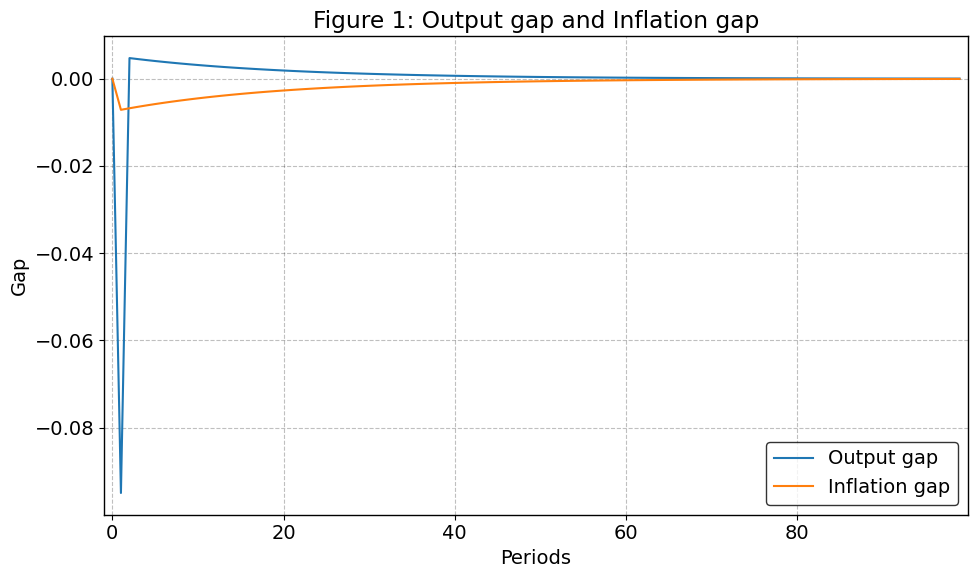

In [6]:
# Instantiate the ASAD model with parameters
model = ASAD(T=100, z=-0.1, z_duration=1)

# Solve the model
model.solve_model()

# Plot the output gap and inflation gap
model.plot_results()

After the shock, which has a negative impact on output gap and inflation gap, it goes back to equlibrium. Furthermore, it has a much larger impact on output than inflation. 

Now, we investigate how a shock affect the curves, and how they transcend back to their original equilibrium in the long run. Here we use a interactive plot, so different types of shocks can be investegated. 

In [7]:
def plot_wrapper(T, shock_type): 
    
    if shock_type == 'positive demand shock': 
        z = 0.01
        s = 0
        z_duration = 1
        s_duration = 0
        
    elif shock_type == 'negative demand shock': 
        z = -0.01
        s = 0
        z_duration = 1
        s_duration = 0
        
    elif shock_type == 'positive supply shock':
        z = 0
        s = -0.01
        z_duration = 0
        s_duration = 1
        
    elif shock_type == 'negative supply shock':
        z = 0
        s = 0.01
        z_duration = 0
        s_duration = 1
        
    # Instantiate the ASAD model with parameters and solve the model with the choosen shock valeus
    
    asad_model = ASAD(T=T, z=z, s=s, gamma=1, alpha=0.8, z_duration=z_duration, s_duration=s_duration) 
    asad_model.solve_model()
    asad_model.plot_ad_as() # Removed the asad_model.plot_results() line
    
periods = Play(value=0,min=0,max=10,step=1,interval=1000,description="Press play",disabled=False) # Added the periods argument

shock_dropdown = Dropdown(options=['positive demand shock', 'negative demand shock', 'positive supply shock', 'negative supply shock'], value='positive demand shock',
    description='Shock type:',disabled=False) # Added the shock_dropdown argument & changed the options

# Adding the slider value to the plot_wrapper function

slider = widgets.IntSlider()
widgets.jslink((periods, 'value'), (slider, 'value'))
widgets.HBox([periods, slider, shock_dropdown])
interact(plot_wrapper, T=periods, shock_type=shock_dropdown)

interactive(children=(Play(value=0, description='Press play', interval=1000, max=10), Dropdown(description='Sh…

<function __main__.plot_wrapper(T, shock_type)>

Positive demand shock:
When a positive demand shock arises, drives the AD curve up. And the AS curve goes with. In further periods, the AS curve goes back down towards equilbrium, and ends up in the same place.
Negative demand shock:
A negative demand has the opposite effect than the positve. The AD curve goes down, and the AS curve goes with. Then the AS goes back towards equilibrium, and it ends up in the same place, in the initial equilibrium.
Positive supply shock:
From the positive supply shock, the AS curve goes up towards equilibrium starting from a lower point, which initially gives higher output. Then it goes back towards equilibrium.
Negative supply shock:
The negative supply shock, makes AS curve start higher, which yelds a lower output. Afterwards it goes up towards equlibrium in the long run.

In [11]:
# Create an instance of the ASAD class with your desired parameters
asad_model = ASAD(T=100, alpha=1,gamma=0.075)

# Solve the model to generate yhat_vec and pihat_vec
asad_model.solve_model()

# Call the social_loss_function method on the instance
asad_model.solve_stochastic_shock(seed=1917)  # Add your seed here.
asad_model.social_loss_function()

plt.plot(asad_model.t_vec, asad_model.yhat_vec_stoc, label="Output-gap") # Plot the output gap
plt.plot(asad_model.t_vec, asad_model.pihat_vec_stoc, label="Inflation-gap") # Plot the inflation gap
plt.xlabel("Periods") # Label the x-axis
plt.ylabel("Gap") # Label the y-axis
plt.title("Figure 1: Output-gap and Inflation-gap") # Add a title
plt.legend() 
plt.show()


IndexError: list index out of range

From the figure, plotting output-gap and inflation-gap, it is clear they have an opposite development. This means, when inflation goes down, output goes up and vice versa. What drives this effect cannot be detected.

# simulation of optimal alpha for minimum social loss

Now, we run a monte carlo simulation, to investage what alpha might minimize the social loss, to minimize the social loss.

The average optimal value of alpha over 100 simulations is: 3.5327
The standard deviation of the optimal value of alpha over 100 simulations is: 1.6914
The average social loss over 100 simulations is: 66.2992


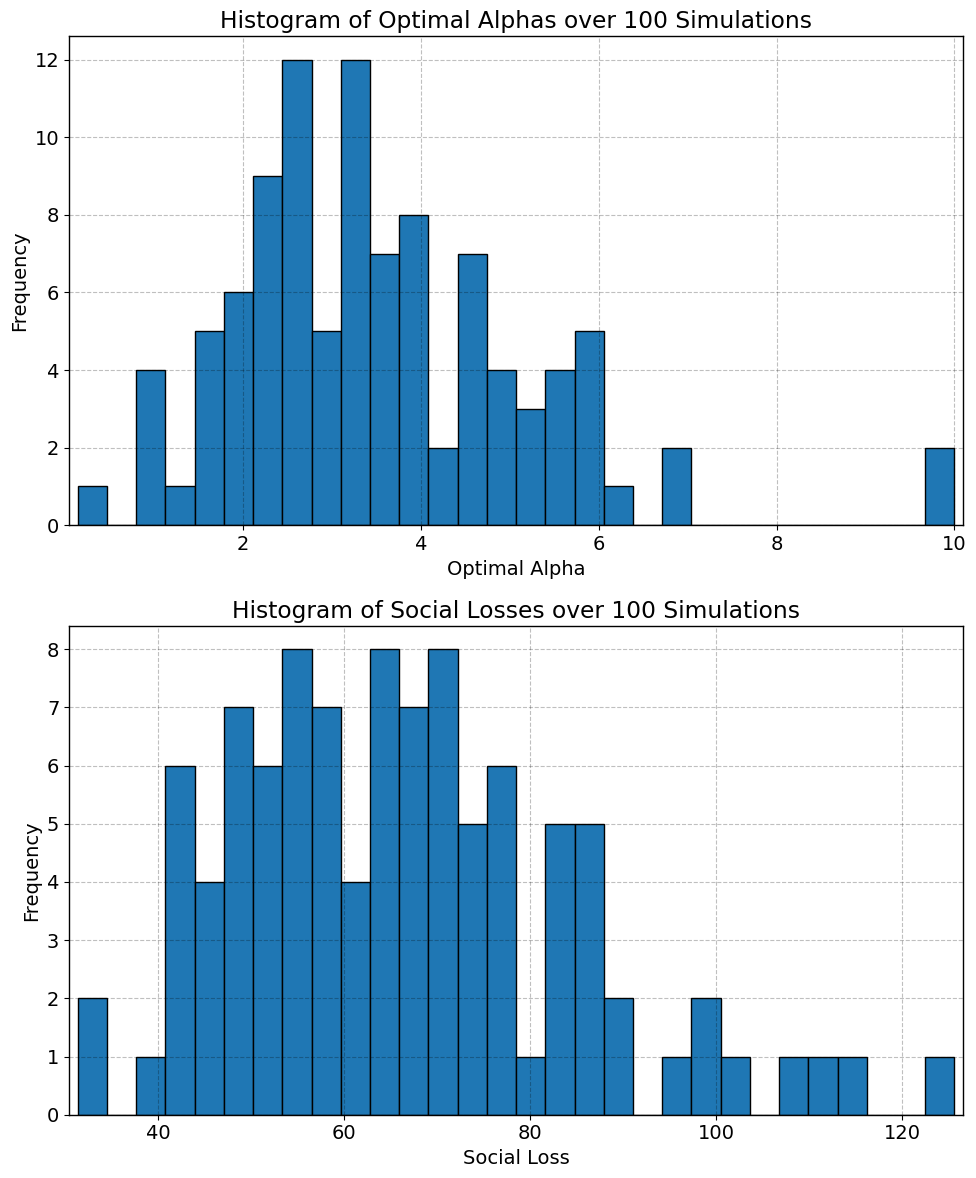

In [4]:
# Initialize lists to store results
all_optimal_alphas = []
all_social_losses = []

# Optimization bounds and initial guess
bound = ((1e-8, 10))
alpha0 = [1]

num_simulations = 100  # Number of simulations

for i in range(num_simulations):
    # Set a different seed for each simulation
    seed = i

    # Create an instance of the ASAD class with your desired parameters
    asad_model = ASAD(T=100, alpha=1, gamma=0.075)

    # Minimize the social loss function for the given seed
    result = optimize.minimize(asad_model.social_loss_alpha, alpha0, args=(seed,), method="Nelder-Mead", bounds=[bound])

    # Extract the optimal alpha value and social loss
    optimal_alpha = result.x[0]
    social_loss = result.fun

    # Append the results to our lists
    all_optimal_alphas.append(optimal_alpha)
    all_social_losses.append(social_loss)

# Calculate the average optimal alpha value and standard deviation
avg_optimal_alpha = np.mean(all_optimal_alphas)
std_optimal_alpha = np.std(all_optimal_alphas)

# Calculate the average social loss
avg_social_loss = np.mean(all_social_losses)

# Print the average optimal alpha value, standard deviation, and average social loss
print(f"The average optimal value of alpha over {num_simulations} simulations is: {avg_optimal_alpha:.4f}")
print(f"The standard deviation of the optimal value of alpha over {num_simulations} simulations is: {std_optimal_alpha:.4f}")
print(f"The average social loss over {num_simulations} simulations is: {avg_social_loss:.4f}")

# Create subplot
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot the histogram of optimal alphas
axs[0].hist(all_optimal_alphas, bins=30, edgecolor='black')
axs[0].set_title(f'Histogram of Optimal Alphas over {num_simulations} Simulations')
axs[0].set_xlabel('Optimal Alpha')
axs[0].set_ylabel('Frequency')

# Plot the histogram of social losses
axs[1].hist(all_social_losses, bins=30, edgecolor='black')
axs[1].set_title(f'Histogram of Social Losses over {num_simulations} Simulations')
axs[1].set_xlabel('Social Loss')
axs[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show() 

# Conclusion

conclude